In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
import joblib

In [2]:
df = pd.read_csv('./individualProjectMLOPI/clean_data.csv')

In [3]:
df.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,belongs_to_collection_name,belongs_to_collection_poster_path,belongs_to_collection_backdrop_path,genres_id,production_companies_name,production_countries_name,spoken_languages_name,release_year,return,director
0,30000000.0,862.0,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,released,NaN,...,toy story collection,/7g9915lfuq2lvfwmeehdsn3kt4b.jpg,/9fbwqcd9irruedurtdcaafomkuq.jpg,animation | comedy | family,pixar animation studios,united states of america,english,1995.0,12.451801,john lasseter
1,65000000.0,8844.0,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,released,roll the dice and unleash the excitement!,...,NaN,NaN,NaN,adventure | fantasy | family,tristar pictures | teitler film | interscope c...,united states of america,english | français,1995.0,4.043035,joe johnston
2,0.0,15602.0,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,released,still yelling. still fighting. still ready for...,...,grumpy old men collection,/nlvudqgpgm3f85nmcii9gvfucet.jpg,/hyptnlot2z8wpfs7qwsqhw1uv8u.jpg,romance | comedy,warner bros. | lancaster gate,united states of america,english,1995.0,0.000000,howard deutch


I AM GONNA START FROM THE BASIC: 
I will focus on: 
    1. Values of central tendency (mean, median, mode).
    2. Values of Variability (minimum, maximum, percentile, variance, correlation).
    3. Shape (if values are symmetrically or assymetrically distributed when it is possible)
    4. Outliers if there are values that represent adnormalities in the data 
    5. Visualization (a combination of statistics and visualization)

#1. VALUES OF CENTRAL TENDENCY AND #2. VARIABILITY

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,belongs_to_collection_id,release_year,return
count,4.553800e+04,45538.000000,45535.000000,4.553800e+04,45278.000000,45535.000000,45535.000000,4500.000000,45451.000000,45538.0
mean,4.223284e+06,108316.948527,2.921916,1.119786e+07,94.128517,5.618232,109.791128,183924.723556,1991.882027,inf
std,1.741372e+07,112403.610181,6.002211,6.428022e+07,38.396184,1.924203,490.920864,141591.163811,24.057726,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10.000000,1874.000000,0.0
25%,0.000000e+00,26411.500000,0.386277,0.000000e+00,85.000000,5.000000,3.000000,86008.000000,1978.000000,0.0
50%,0.000000e+00,60012.500000,1.128317,0.000000e+00,95.000000,6.000000,10.000000,141448.000000,2001.000000,0.0
75%,0.000000e+00,157170.750000,3.681459,0.000000e+00,107.000000,6.800000,34.000000,294172.000000,2010.000000,0.0
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,inf


In [5]:
 # AVERAGE VALUE OF REVENUE, BUDGET AND RETURN BY PRODUCTION_COMPANIES_NAME
 
average_revenue_by_company = df.groupby('production_companies_name')[['revenue', 'budget','return']].mean()

average_revenue_by_company.sort_values(by='revenue', ascending=False)

,revenue,budget,return
production_companies_name,,,
ingenious film partners | twentieth century fox film corporation | dune entertainment | lightstorm entertainment,2.787965e+09,237000000.0,11.763566
lucasfilm | truenorth productions | bad robot,2.068224e+09,245000000.0,8.441729
paramount pictures | twentieth century fox film corporation | lightstorm entertainment,1.845034e+09,200000000.0,9.225171
universal studios | amblin entertainment | legendary pictures | fuji television network | dentsu,1.513529e+09,150000000.0,10.090192
"universal pictures | original film | fuji television network | dentsu | one race films | china film co. | québec production services tax credit | media rights capital (mrc) | abu dhabi film commission | colorado office of film, television & media",1.506249e+09,190000000.0,7.927628
...,...,...,...
grand national pictures | zion meyers productions,0.000000e+00,0.0,0.000000
grand national pictures | moviestore entertainment,0.000000e+00,350000.0,0.000000
grand national pictures | international film corporation,0.000000e+00,0.0,0.000000


In [6]:
 # AVERAGE VALUE OF REVENUE, BUDGET AND RETURN BY PRODUCTION_COUNTRIES_NAME
 
average_revenue_by_company = df.groupby('production_countries_name')[['revenue', 'budget','return']].mean()

average_revenue_by_company.sort_values(by='revenue', ascending=False)

,revenue,budget,return
production_countries_name,,,
united states of america | malta | france | united kingdom,767820459.0,125000000.0,6.142564
czech republic | united states of america | united arab emirates,694713380.0,145000000.0,4.791127
united states of america | taiwan | united kingdom,609016565.0,120000000.0,5.075138
italy | united kingdom | united states of america | czech republic | germany,599045960.0,150000000.0,3.993640
new zealand | united states of america | germany,550000000.0,207000000.0,2.657005
...,...,...,...
france | mexico,0.0,95600.0,0.000000
france | luxembourg | united kingdom,0.0,0.0,0.000000
france | luxembourg | belgium,0.0,0.0,0.000000


In [7]:
 # AVERAGE VALUE OF REVENUE, BUDGET AND RETURN BY GENRES
 
average_revenue_by_company = df.groupby('genres_id')[['revenue', 'budget','return']].mean()

average_revenue_by_company.sort_values(by='revenue', ascending=False)

,revenue,budget,return
genres_id,,,
action | animation | adventure | family | comedy,1.020063e+09,80000000.0,12.750792
family | adventure | drama | fantasy,9.665506e+08,175000000.0,5.523146
adventure | fantasy | family | mystery,9.382127e+08,150000000.0,6.254752
drama | comedy | animation | family,8.576112e+08,175000000.0,4.900635
action | thriller | science fiction | mystery | adventure,8.255328e+08,160000000.0,5.159580
...,...,...,...
crime | mystery | thriller | horror,0.000000e+00,0.0,0.000000
crime | romance | drama,0.000000e+00,0.0,0.000000
crime | science fiction,0.000000e+00,0.0,0.000000


In [8]:
# NUMBER OF RELEASED MOVIES AVERAGE BY YEAR

num_movies_by_year = df[df['status'] == 'released'].groupby('release_year').size().reset_index(name='count')
num_movies_by_year = num_movies_by_year.sort_values(by='count', ascending=False)

num_movies_by_year

,release_year,count
129,2014.0,1964
128,2013.0,1887
130,2015.0,1876
127,2012.0,1713
126,2011.0,1647
...,...,...
8,1893.0,1
1,1878.0,1
3,1887.0,1
2,1883.0,1


In [9]:
# Function to extract distinct genres from the 'genres_id' column
def extract_genres(genres):
    unique_genres = set()
    for genre in genres:
        if isinstance(genre, str):
            unique_genres.update(genre.split(' | '))
    return list(unique_genres)

# Extract distinct genres
genres = extract_genres(df['genres_id'])

# Count occurrences of each genre
genre_counts = [df['genres_id'].str.contains(genre).sum() for genre in genres]

# Create a DataFrame for plotting
genre_data = pd.DataFrame({'genres': genres, 'count': genre_counts})

# Sort the DataFrame by count in descending order
genre_data = genre_data.sort_values(by='count', ascending=False)

# Merge additional columns 'popularity', 'budget', 'revenue', and 'vote_count' to genre_data
additional_columns = ['budget', 'revenue', 'popularity', 'vote_count']
for column in additional_columns:
    genre_data[column] = genre_data['genres'].apply(lambda x: df[df['genres_id'].notna() & df['genres_id'].str.contains(x)][column].mean())

# Replace NaN values with 0
genre_data = genre_data.replace(np.nan, 0)

# Print the updated genre_data DataFrame
genre_data

,genres,count,budget,revenue,popularity,vote_count
1,drama,20312,3.461447e+06,7.922660e+06,3.012957,96.428979
3,comedy,13196,4.563969e+06,1.265277e+07,3.233100,109.077827
4,thriller,7640,7.287825e+06,1.701116e+07,4.486627,187.886896
9,romance,6746,3.877476e+06,1.090612e+07,3.121132,95.802698
16,action,6607,1.176890e+07,3.051208e+07,4.767893,258.723694
15,horror,4679,2.533722e+06,6.590531e+06,3.560650,100.721676
19,crime,4314,6.420158e+06,1.471622e+07,4.148025,175.971256
7,documentary,3937,1.186033e+05,3.681810e+05,0.947994,12.819914
8,adventure,3508,1.880072e+07,5.712677e+07,5.994139,409.176169
13,science fiction,3061,1.157941e+07,3.203194e+07,4.995020,321.366133


In [10]:
# Group the data by 'genres_id' and calculate the average values
genre_averages = df.groupby('genres_id').agg({
    'budget': 'mean',
    'revenue': 'mean',
    'popularity': 'mean',
    'vote_count': 'mean'
}).reset_index()

# Print the genre_averages DataFrame
genre_averages

,genres_id,budget,revenue,popularity,vote_count
0,action,4.572418e+06,1.080632e+07,2.781620,72.863309
1,action | adventure,1.074973e+07,1.844821e+07,3.673668,114.881720
2,action | adventure | animation,3.500000e+05,0.000000e+00,3.758203,73.000000
3,action | adventure | animation | comedy,0.000000e+00,0.000000e+00,2.920726,17.500000
4,action | adventure | animation | comedy | crime,0.000000e+00,0.000000e+00,0.961479,23.000000
...,...,...,...,...,...
4060,western | science fiction,2.000000e+06,0.000000e+00,1.225217,9.000000
4061,western | thriller,2.333333e+06,2.049000e+03,2.560855,29.000000
4062,western | tv movie,2.500000e+06,0.000000e+00,0.726138,2.000000
4063,western | war,0.000000e+00,0.000000e+00,0.515080,5.000000


In [11]:
# Extract distinct genres
genres = extract_genres(df['genres_id'])

# Create an empty DataFrame to store the genre averages
genre_averages = pd.DataFrame(columns=['genres', 'budget_avg', 'revenue_avg', 'popularity_avg', 'vote_count_avg'])

# Calculate average values for each genre
for genre in genres:
    genre_data = df[df['genres_id'].notna() & df['genres_id'].str.contains(genre)]
    if len(genre_data) > 0:
        genre_avg = {
            'genres': genre,
            'budget_avg': genre_data['budget'].mean(),
            'revenue_avg': genre_data['revenue'].mean(),
            'popularity_avg': genre_data['popularity'].mean(),
            'vote_count_avg': genre_data['vote_count'].mean()
        }
        genre_averages = pd.concat([genre_averages, pd.DataFrame([genre_avg])], ignore_index=True)

# Print the genre_averages DataFrame
genre_averages

,genres,budget_avg,revenue_avg,popularity_avg,vote_count_avg
0,family,1.212028e+07,3.872682e+07,4.733584,241.836455
1,drama,3.461447e+06,7.922660e+06,3.012957,96.428979
2,western,3.050326e+06,4.916026e+06,2.629321,75.356046
3,comedy,4.563969e+06,1.265277e+07,3.233100,109.077827
4,thriller,7.287825e+06,1.701116e+07,4.486627,187.886896
5,foreign,2.463221e+05,1.791359e+05,0.764539,8.023342
6,tv movie,2.723654e+05,5.461638e+04,2.040625,20.765625
7,documentary,1.186033e+05,3.681810e+05,0.947994,12.819914
8,adventure,1.880072e+07,5.712677e+07,5.994139,409.176169
9,romance,3.877476e+06,1.090612e+07,3.121132,95.802698


#2. VARABILITY: Range(minmum,maximum) and correlation

In [12]:
# Convert 'release_date' column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Create a dictionary with the column names and corresponding minimum and maximum values
data = {
    'column': ['budget', 'revenue', 'return', 'popularity', 'runtime', 'release_date', 'vote_count'],
    'minimum': [df['budget'].min(), df['revenue'].min(), df['return'].min(), df['popularity'].min(),
                df['runtime'].min(), df['release_date'].min(), df['vote_count'].min()],
    'maximum': [df['budget'].max(), df['revenue'].max(), df['return'].max(), df['popularity'].max(),
                df['runtime'].max(), df['release_date'].max(), df['vote_count'].max()]
}

# Create a DataFrame from the dictionary
df_min_max = pd.DataFrame(data)

# Print the DataFrame
df_min_max

,column,minimum,maximum
0,budget,0.0,380000000.0
1,revenue,0.0,2787965087.0
2,return,0.0,inf
3,popularity,0.0,547.488298
4,runtime,0.0,1256.0
5,release_date,1874-12-09 00:00:00,2020-12-16 00:00:00
6,vote_count,0.0,14075.0


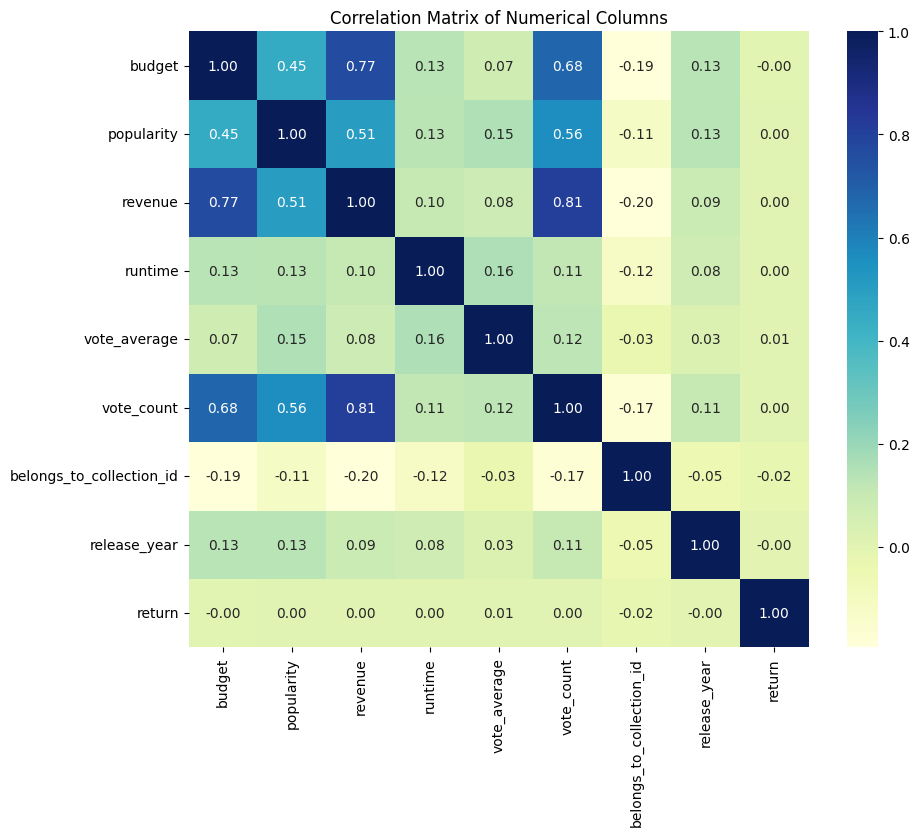

In [13]:
def convertto_boolean(x):
    ''' It converts an object value into boolean 
    and returns NaN if the value is incorrect'''
    try :
        x = bool(x)
    except:
        x = np.nan
    return x

def convertto_int(num):
    try:
        num = int(num)
    except:
        num = np.nan
    return num

def convertto_float(num):
    try:
        num = float(num)
    except:
        num = np.nan
    return num

def convertto_category(num):
    try:
        num = category(num)
    except:
        num = np.nan
    return num


#df['adult'] = df['adult'].apply(convertto_boolean)
df['budget'] = df['budget'].apply(convertto_float)
df['id'] = df['id'].apply(convertto_int)
df['original_language'] = df['original_language'].apply(convertto_category)
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['revenue'] = df['revenue'].apply(convertto_float)
df['runtime'] = df['runtime'].apply(convertto_int)
#df['video'] = df['video'].apply(convertto_boolean)
df['vote_average'] = df['vote_average'].apply(convertto_float)
df['vote_count'] = df['vote_count'].apply(convertto_float)

numerical_column = df.select_dtypes(include='number').drop(["id", "original_language"], axis=1)
correlation_matrix = numerical_column.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

#3. SHAPE

"Skewness is a measure of symmetry for a distribution. Negative values represent a left-skewed distribution where there are more extreme values to the left causing the mean to be less than the median. Positive values represent a right-skewed distribution where there are more extreme values to the right causing the mean to be more than the median.

Kurtosis is a measure of peakedness for a distribution. Negative values indicate a flat (platykurtic) distribution, positive values indicate a peaked (leptokurtic) distribution, and a near-zero value indicates a normal (mesokurtic) distribution."

In [14]:
# Calculate skewness and kurtosis for numerical columns
numerical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'release_year', 'return']
skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

# Create a DataFrame to store the results
statistics = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Print the DataFrame
statistics

,Skewness,Kurtosis
budget,7.127182,66.820604
revenue,12.275294,237.885656
popularity,29.224297,1926.612465
runtime,4.461888,93.177305
release_year,-1.225382,0.840660
return,NaN,NaN


In [15]:
# Specify the numerical columns
numerical_columns = ['budget', 'revenue', 'runtime', 'popularity', 'vote_count']

# Convert the columns to numeric if needed
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Compute the distribution statistics for numerical columns
distribution_stats = df[numerical_columns].describe()

# Print the distribution statistics
print(distribution_stats)

             budget       revenue       runtime    popularity    vote_count
count  4.553800e+04  4.553800e+04  45278.000000  45535.000000  45535.000000
mean   4.223284e+06  1.119786e+07     94.128517      2.921916    109.791128
std    1.741372e+07  6.428022e+07     38.396184      6.002211    490.920864
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00  0.000000e+00     85.000000      0.386277      3.000000
50%    0.000000e+00  0.000000e+00     95.000000      1.128317     10.000000
75%    0.000000e+00  0.000000e+00    107.000000      3.681459     34.000000
max    3.800000e+08  2.787965e+09   1256.000000    547.488298  14075.000000


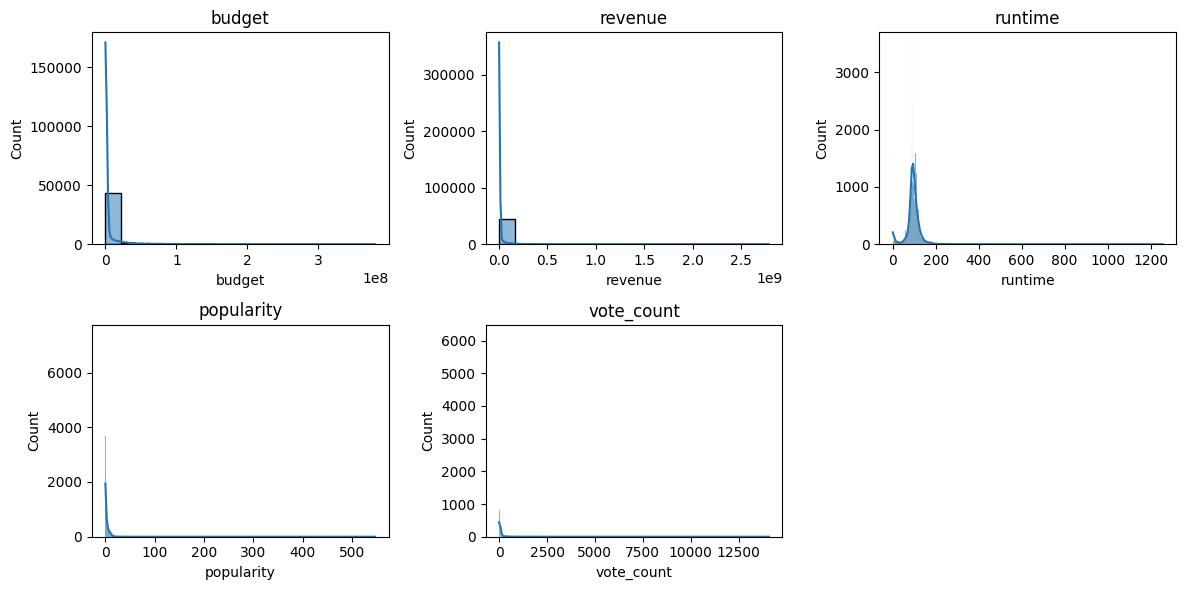

In [16]:
# Specify the numerical columns
numerical_columns = ['budget', 'revenue', 'runtime', 'popularity', 'vote_count']

# Convert the columns to numeric if needed
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Plot histograms with KDE
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

#4. OUTLIERS

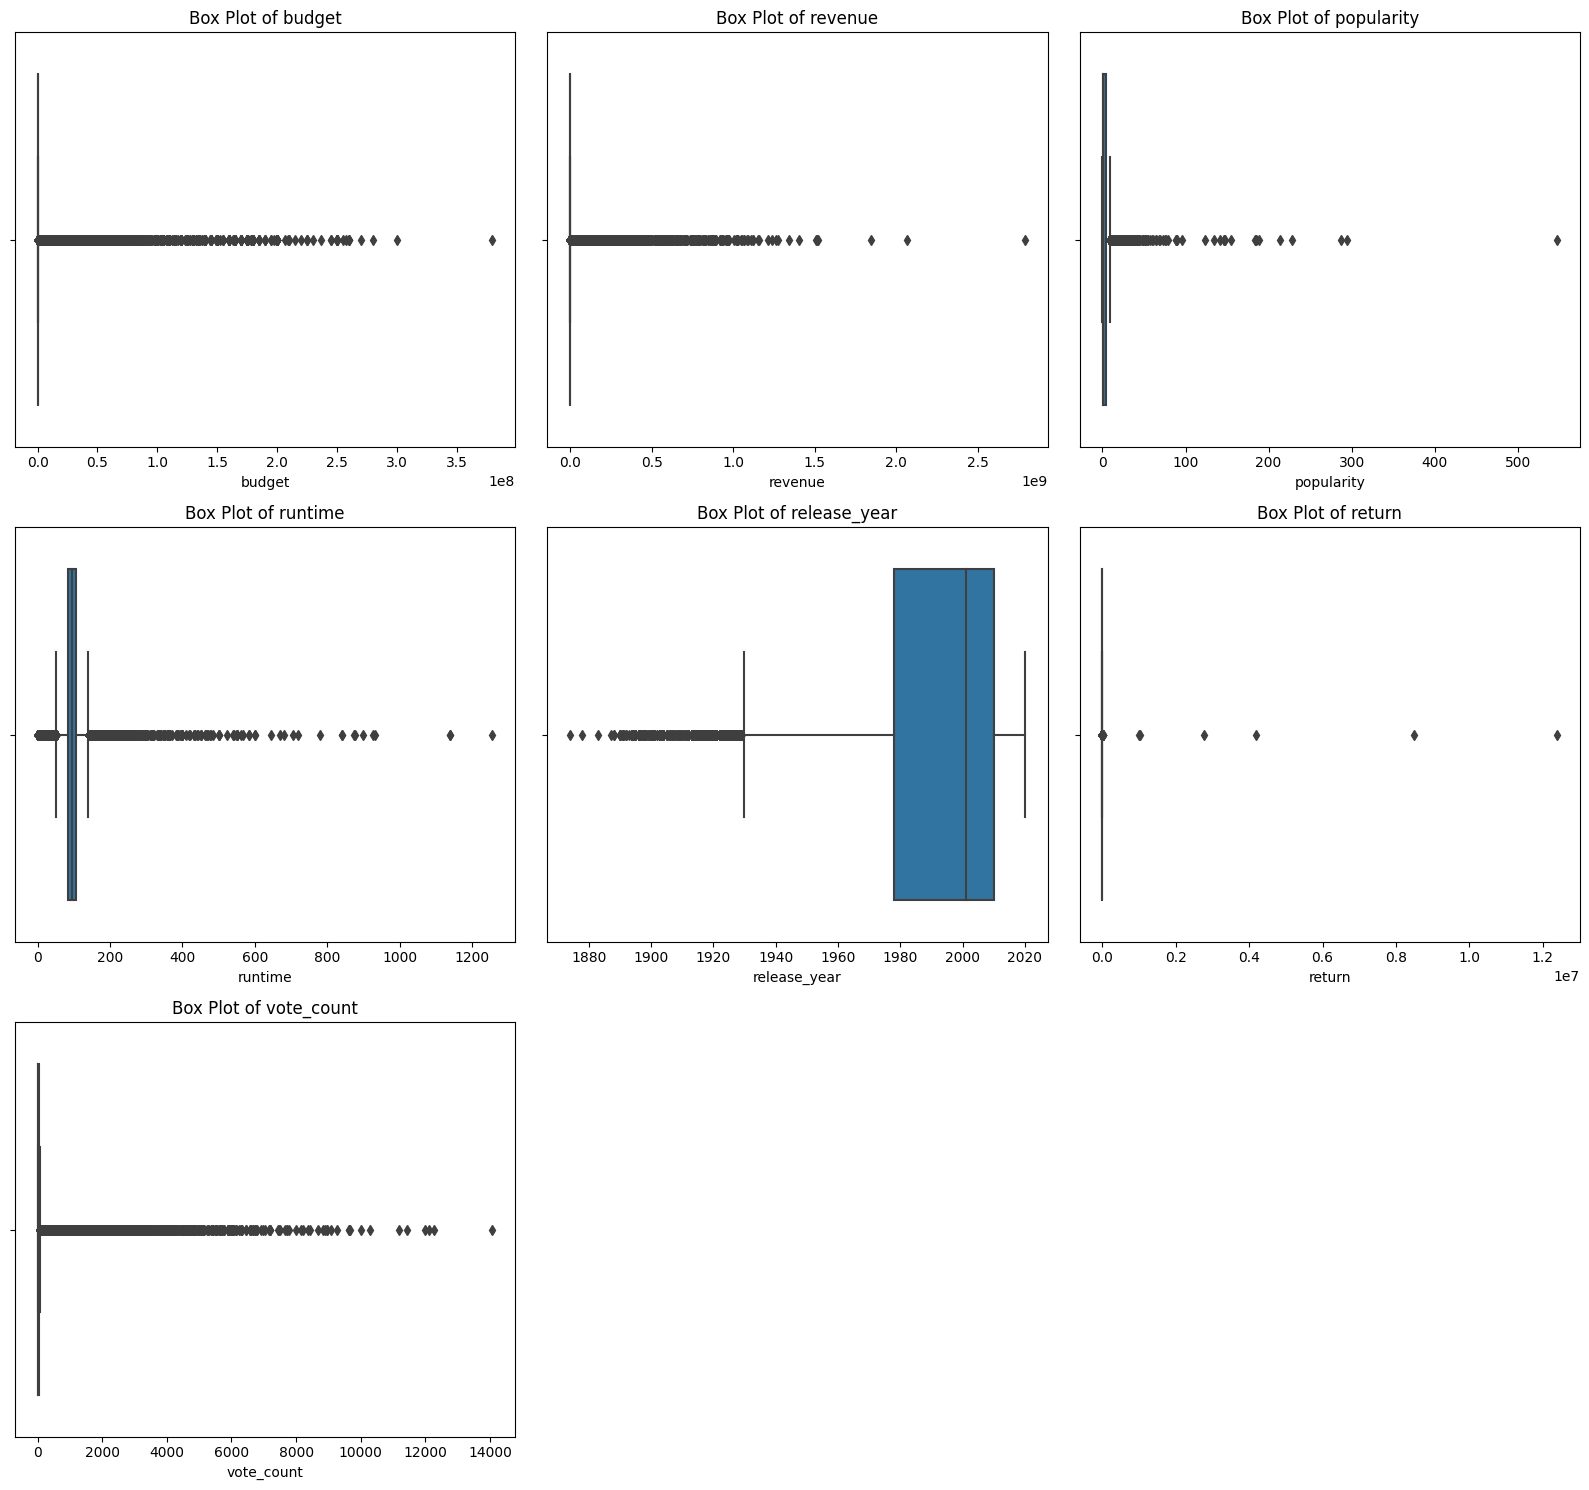

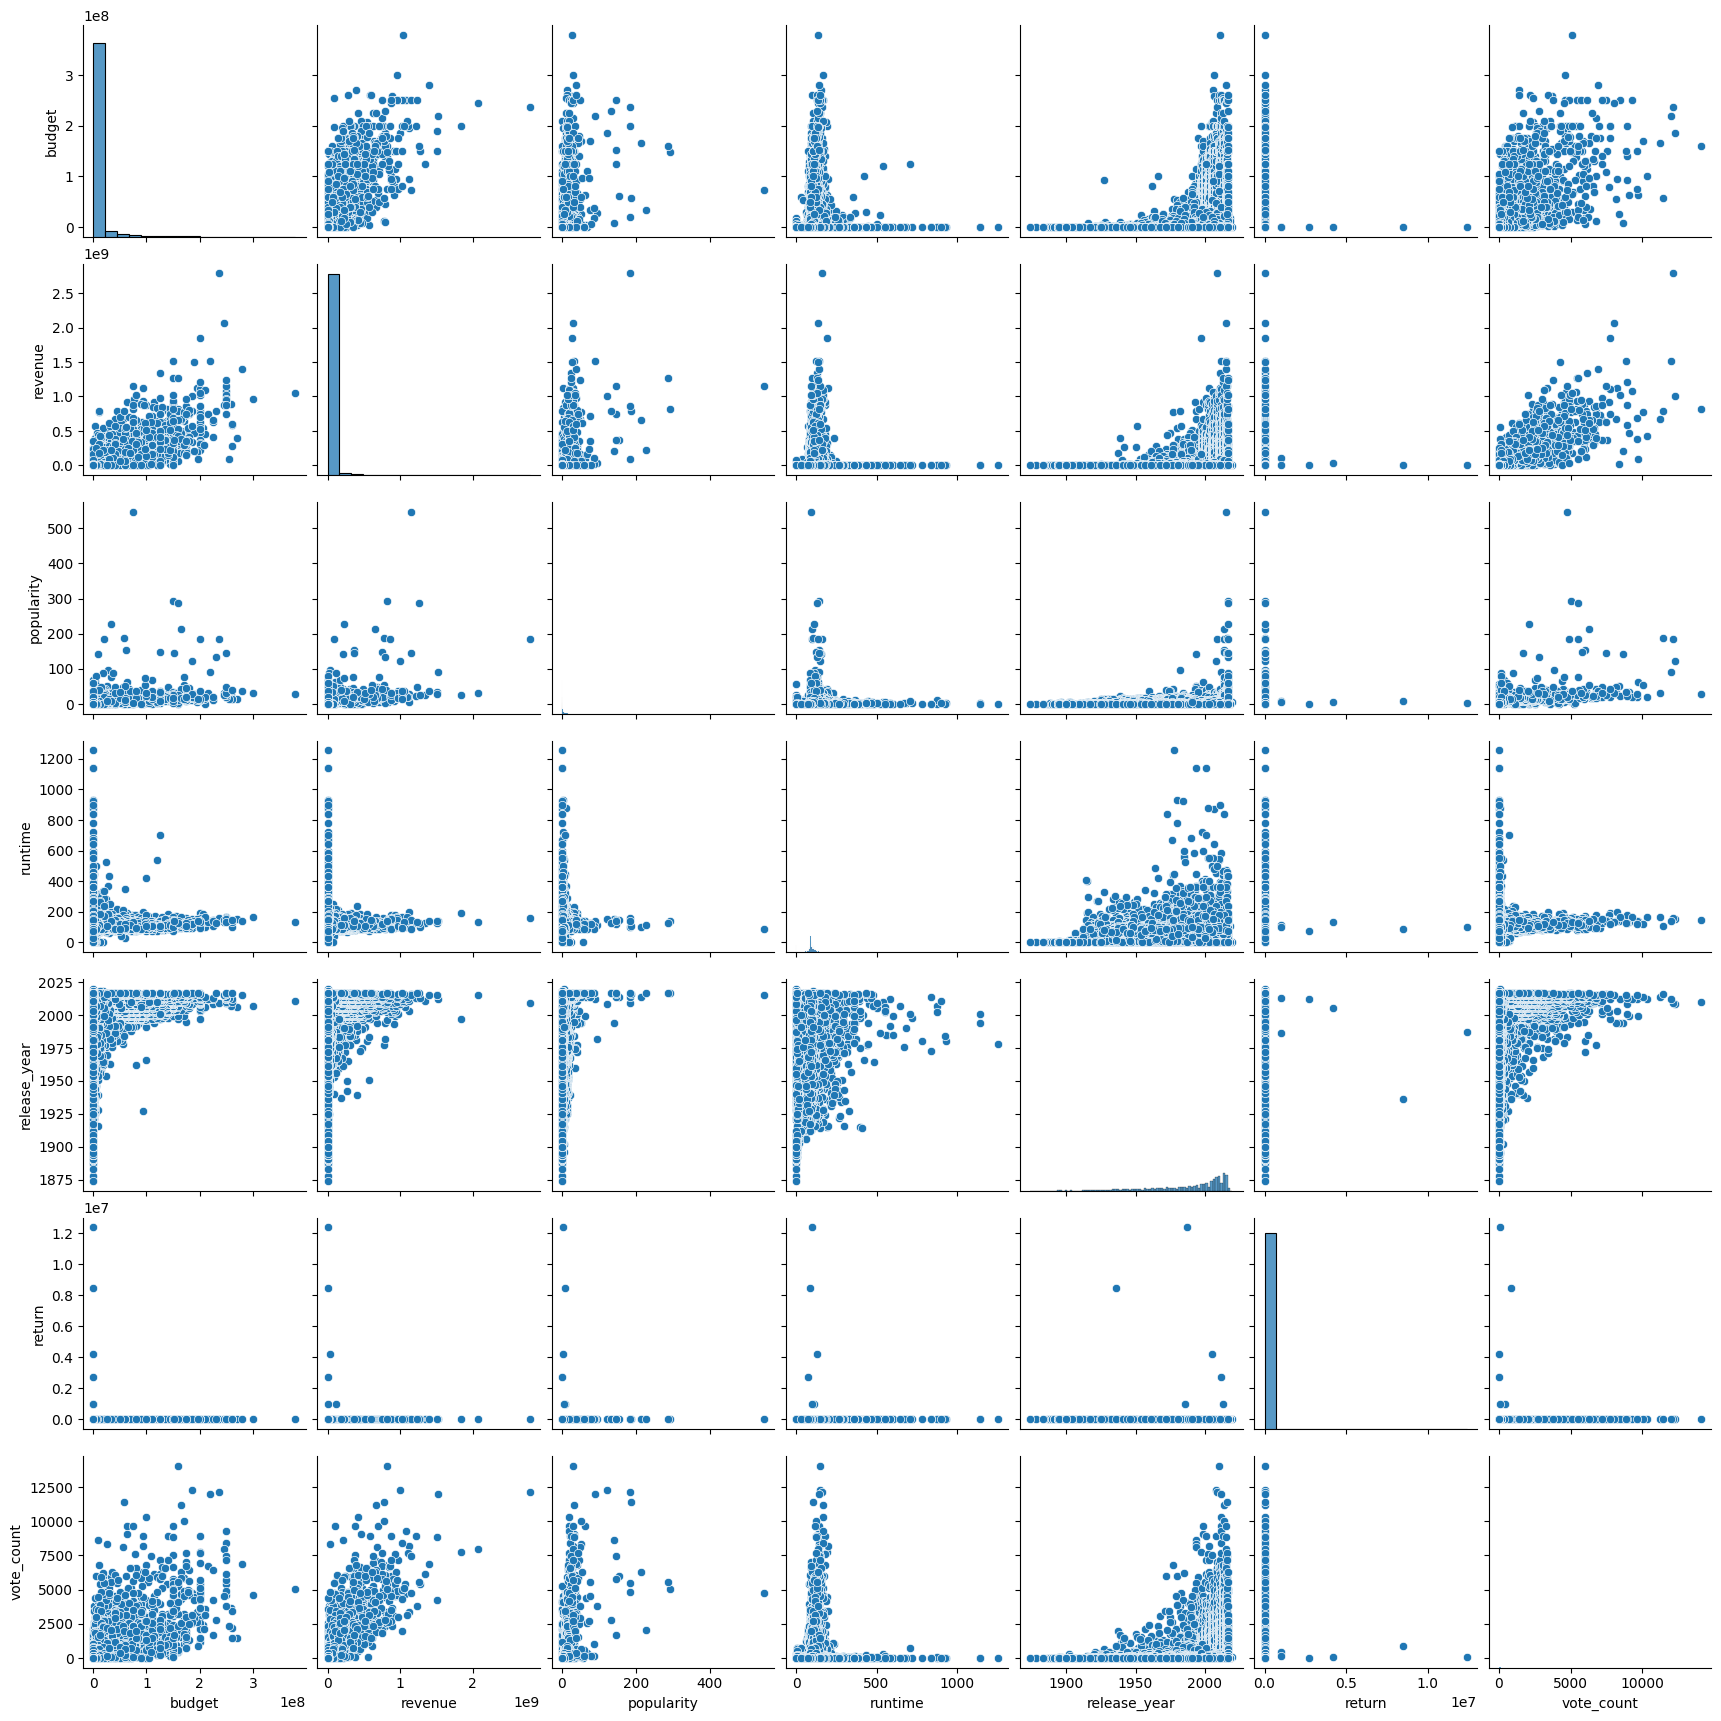

In [17]:
# Specify the numerical columns to analyze
numerical_columns = ['budget', 'revenue', 'popularity', 'runtime', 'release_year', 'return', 'vote_count']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(df[numerical_columns])
plt.show()

#5. VISUALIZATION

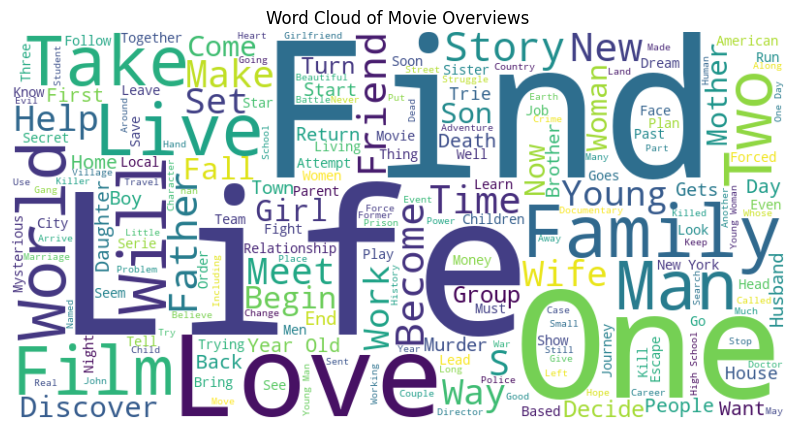

In [18]:
from wordcloud import WordCloud


# Combine all the overview texts into a single string
df['overview'] = df['overview'].str.title()
text = ' '.join(df['overview'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()

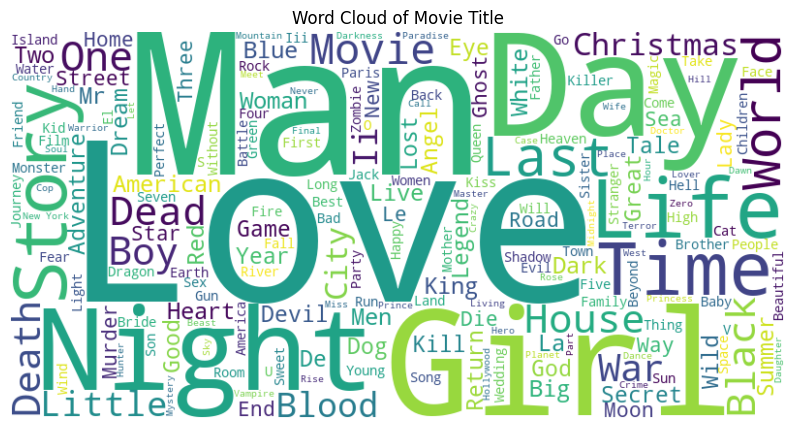

In [19]:

# Combine all the overview texts into a single string
df['title'] = df['title'].str.title()
text = ' '.join(df['title'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Title')
plt.show()


<Axes: xlabel='genres'>

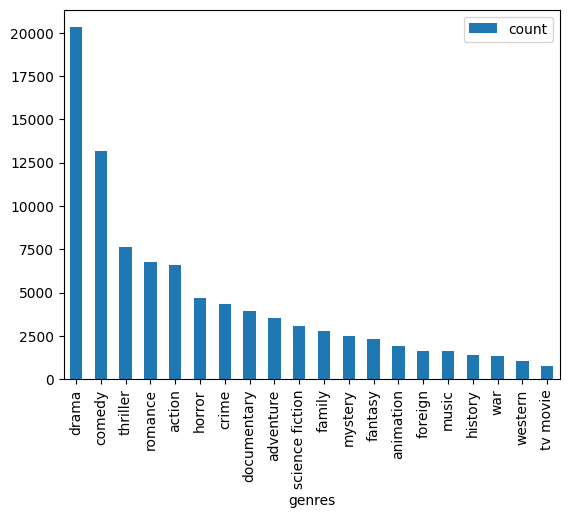

In [20]:
# Function to extract distinct genres from the 'genres_id' column
def extract_genres(genres):
    unique_genres = set()
    for genre in genres:
        if isinstance(genre, str):
            unique_genres.update(genre.split(' | '))
    return list(unique_genres)

# Extract distinct genres
genres = extract_genres(df['genres_id'])
#genres = df['genres_id'].apply(extract_genres) # this doens work


# Count occurrences of each genre
genre_counts = [df['genres_id'].str.contains(genre).sum() for genre in genres]

# Create a DataFrame for plotting
genre_data = pd.DataFrame({'genres': genres, 'count': genre_counts})

# Sort the DataFrame by count in descending order
genre_data = genre_data.sort_values(by='count', ascending=False)

# Plot the graph
genre_data.plot(kind='bar', x='genres', y='count')


In [21]:
genres

['family',
 'drama',
 'western',
 'comedy',
 'thriller',
 'foreign',
 'tv movie',
 'documentary',
 'adventure',
 'romance',
 'fantasy',
 'war',
 'animation',
 'science fiction',
 'mystery',
 'horror',
 'action',
 'history',
 'music',
 'crime']

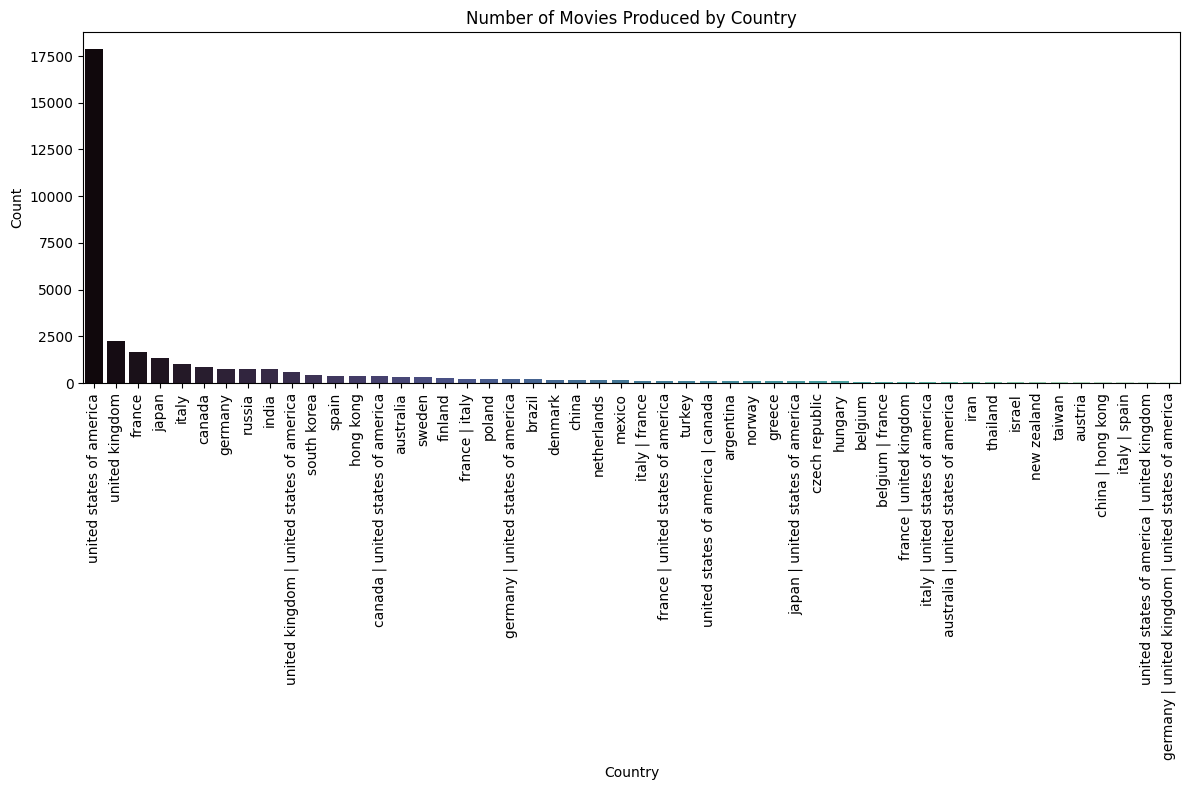

In [22]:
# Function to extract distinct genres from the 'production_countries_name' column
def extract_countries(countries):
    unique_countries = set()
    for country in countries:
        if isinstance(country, str):
            unique_countries.update(country.split(' | '))
    return list(unique_countries)

# Count occurrences of each country
country_counts = df['production_countries_name'].value_counts()

# Select the top 50 production countries
top_50_countries = country_counts.head(50)

# Create a DataFrame for plotting
country_data = pd.DataFrame({'country': top_50_countries.index, 'count': top_50_countries.values})

# Sort the DataFrame by count in descending order
country_data = country_data.sort_values(by='count', ascending=False)

# Plot the graph
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='count', data=country_data, palette="mako")

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Movies Produced by Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [23]:
df = pd.read_csv('./individualProjectMLOPI/clean_data.csv')

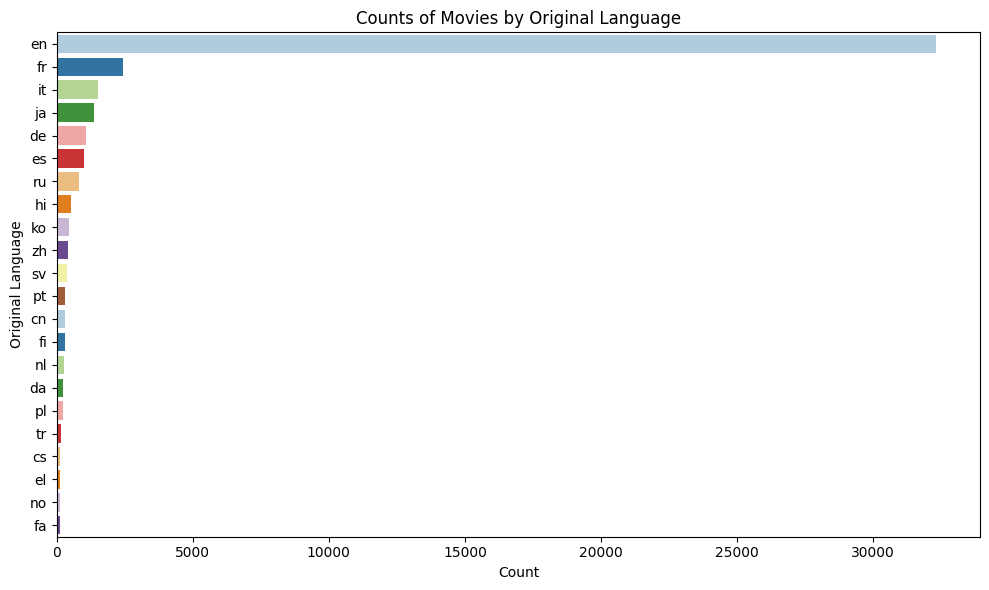

In [24]:
# Count occurrences of each language
language_counts = df['original_language'].value_counts()
language_counts = language_counts[language_counts > 100]

# Create a DataFrame for plotting
language_data = pd.DataFrame({'original_language': language_counts.index, 'count': language_counts.values})

# Sort the DataFrame by count in ascending order
language_data = language_data.sort_values(by='count', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='original_language', data=language_data, color='black', palette='Paired')

# Set axis labels and title
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.title('Counts of Movies by Original Language')

plt.tight_layout()
plt.show()

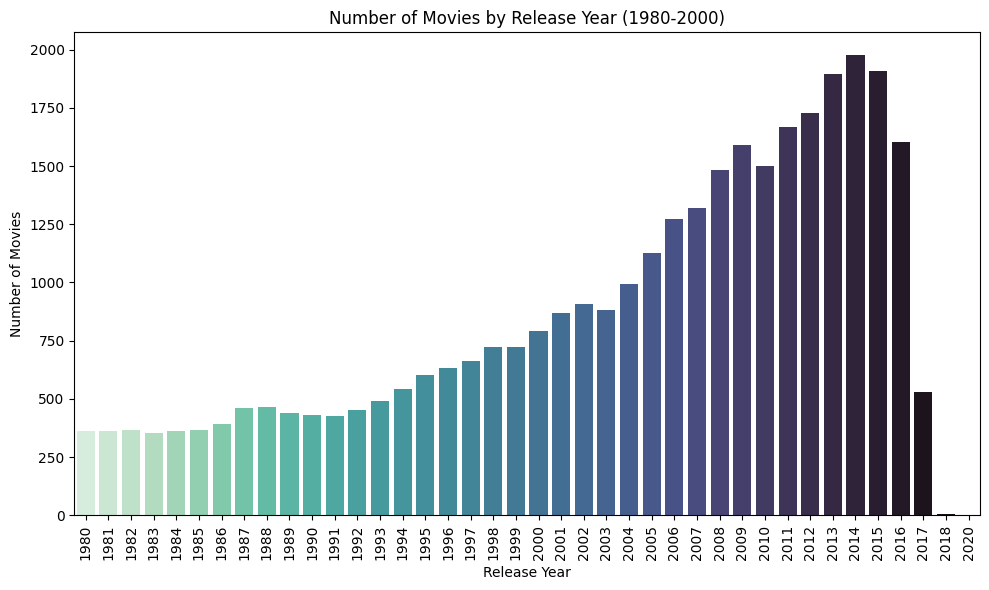

In [25]:
# Filter the data for years between 1980 and 2000

df['release_year'] = df['release_year'].astype("Int64")

filtered_df = df[(df['release_year'] >= 1980) & (df['release_year'] <= df['release_year'].max())]


# Count the number of movies by release year
movies_by_year = filtered_df['title'].groupby(filtered_df['release_year']).count().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='release_year', y='title', data=movies_by_year, palette='mako_r')

# Set axis labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Release Year (1980-2000)')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

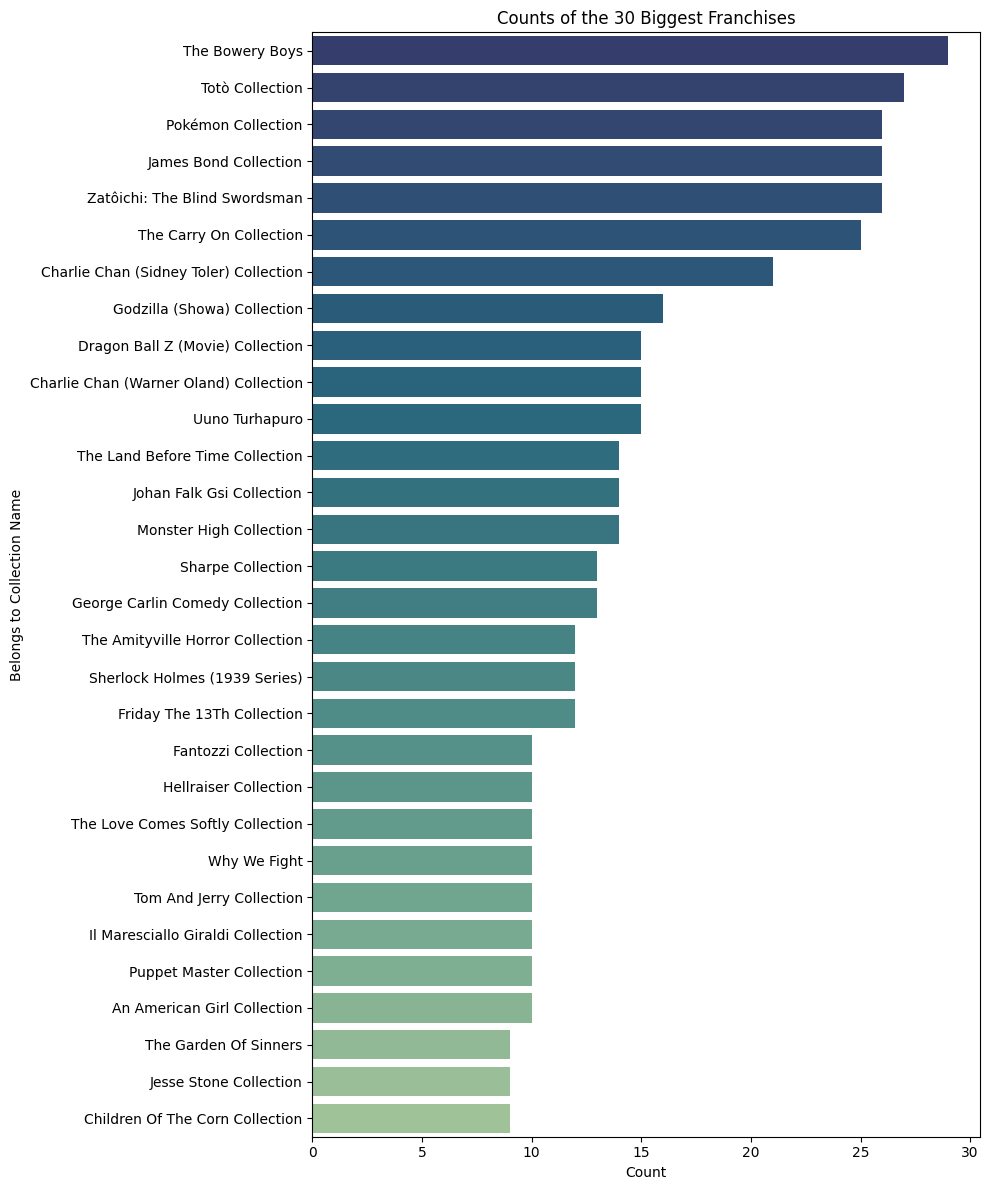

In [26]:
# Count occurrences of each collection name

df['belongs_to_collection_name'] = df['belongs_to_collection_name'].str.title()

collection_counts = df['belongs_to_collection_name'].value_counts()

# Select the top 30 franchises
top_30_franchises = collection_counts.head(30)

# Create a DataFrame for plotting
collection_data = pd.DataFrame({'collection_name': top_30_franchises.index, 'count': top_30_franchises.values})

# Sort the DataFrame by count in descending order
collection_data = collection_data.sort_values(by='count', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(10, 12))
sns.barplot(x='count', y='collection_name', data=collection_data, palette="crest_r")
plt.xlabel('Count')
plt.ylabel('Belongs to Collection Name')
plt.title('Counts of the 30 Biggest Franchises')
plt.tight_layout()

plt.show()

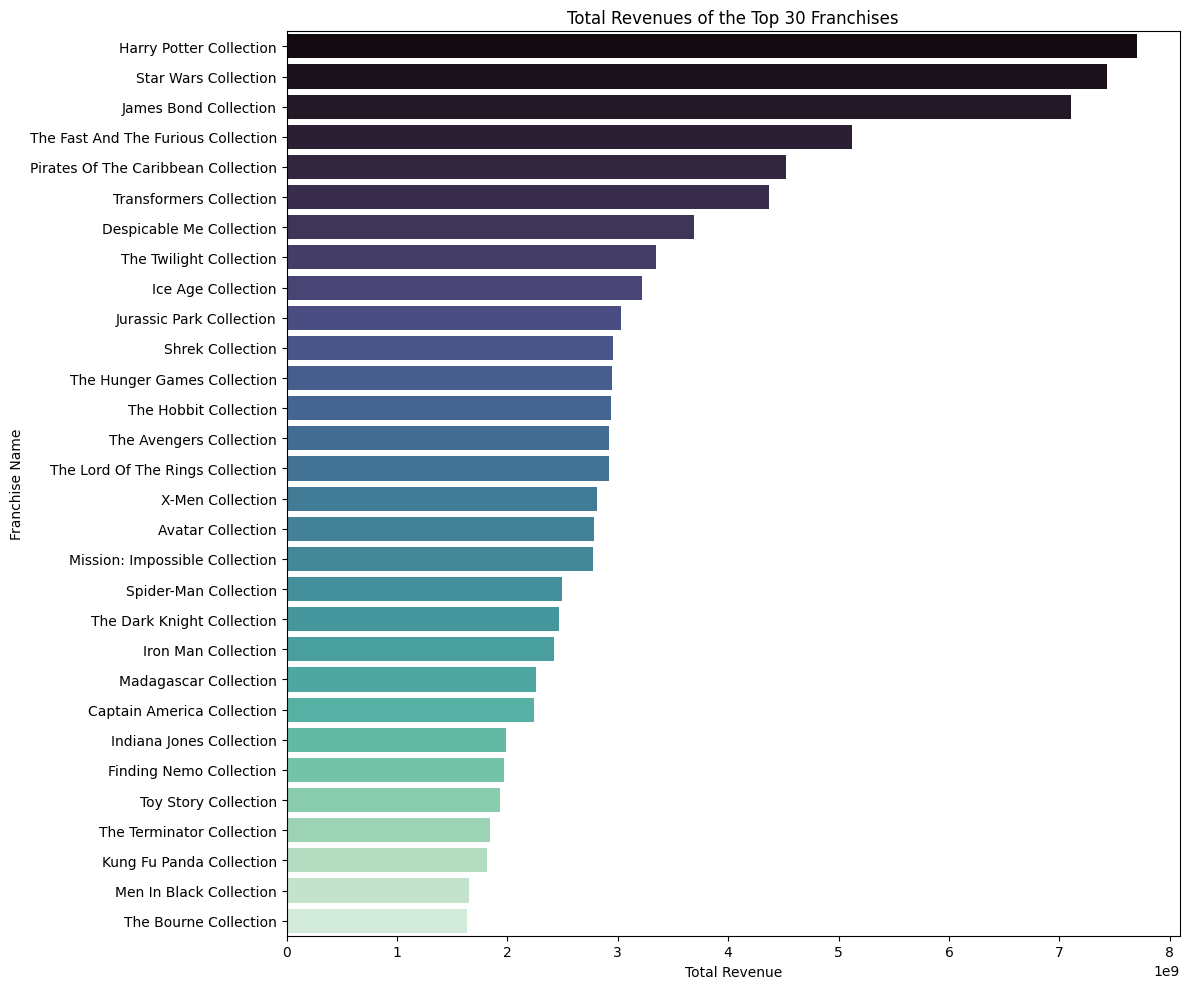

In [27]:
# Calculate the total revenues for each franchise

df['belongs_to_collection_name'] = df['belongs_to_collection_name'].str.title()

franchise_revenues = df.groupby('belongs_to_collection_name')['revenue'].sum()

# Select the top franchises by total revenue
top_franchises = franchise_revenues.nlargest(30)

# Create a DataFrame for plotting
franchise_data = pd.DataFrame({'franchise_name': top_franchises.index, 'revenue': top_franchises.values})

# Sort the DataFrame by revenue in descending order
franchise_data = franchise_data.sort_values(by='revenue', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='revenue', y='franchise_name', data=franchise_data, palette="mako")
plt.xlabel('Total Revenue')
plt.ylabel('Franchise Name')
plt.title('Total Revenues of the Top 30 Franchises')
plt.tight_layout()

plt.show()

C:\Users\jeanpc\AppData\Local\Temp\ipykernel_868\1537141627.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


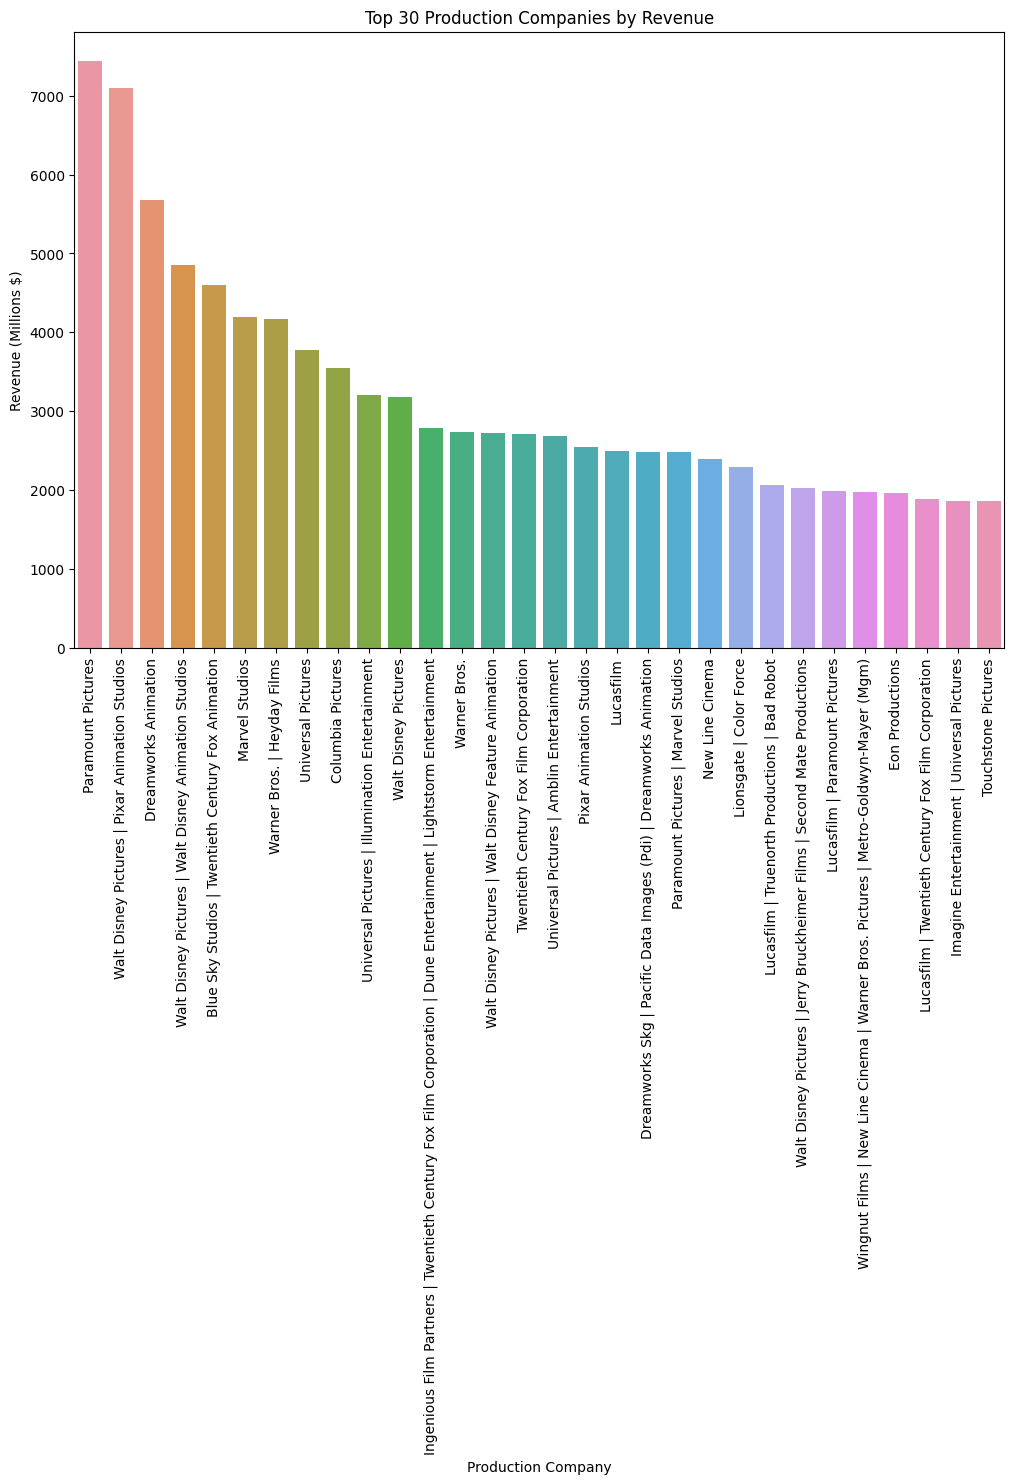

In [28]:
# Calculate the total revenues for each production company and convert to millions

df['production_companies_name'] = df['production_companies_name'].str.title()

company_revenues = df.groupby('production_companies_name')['revenue'].sum() / 1000000

# Select the top 30 production companies by total revenue
top_30_companies = company_revenues.nlargest(30)

# Create a DataFrame for plotting
company_data = pd.DataFrame({'production_company': top_30_companies.index, 'revenue': top_30_companies.values})

# Sort the DataFrame by revenue in descending order
company_data = company_data.sort_values(by='revenue', ascending=False)

# Create the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='production_company', y='revenue', data=company_data)
plt.xlabel('Production Company')
plt.ylabel('Revenue (Millions $)')
plt.title('Top 30 Production Companies by Revenue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [29]:

# Select the relevant columns
selected_columns = ["director", "popularity", "budget", "revenue", "vote_count"]

# Convert selected columns to numeric types
df[selected_columns[1:]] = df[selected_columns[1:]].apply(pd.to_numeric, errors="coerce")

# Calculate the average values by director
average_data = df[selected_columns].groupby("director").mean().reset_index()

# Sort the average data by descending order of average values
average_data = average_data.sort_values(by="popularity", ascending=False)

# Display the average data DataFrame
average_data

,director,popularity,budget,revenue,vote_count
16214,tim miller,187.860492,58000000.0,783112979.0,11444.0
12697,patty jenkins,150.763031,78500000.0,440479515.5,2762.5
9539,kyle balda,120.485962,44800000.0,505126932.4,1602.6
2470,chad stahelski,116.558939,30000000.0,130150774.0,4211.5
2757,chris williams,114.715411,157500000.0,481042718.5,4043.5
...,...,...,...,...,...
14001,robert child,0.000000,20.0,0.0,0.0
12725,paul cowan,0.000000,0.0,0.0,0.0
16717,vasilis vafeas,0.000000,0.0,0.0,0.0
7079,jamey durham,0.000000,0.0,0.0,0.0


In [30]:

average_data[average_data['director'] == 'john ford']

,director,popularity,budget,revenue,vote_count
8058,john ford,3.046887,539657.181818,1.290466e+06,33.484848
